# Import packages

In [1]:
#!pip install pandas

In [2]:
#!pip install --upgrade opencv-python

In [3]:
#!pip install numpy

In [4]:
#!pip install scipy

In [5]:
#!pip install Pillow

In [6]:
#!pip install matplotlib

In [7]:
#!pip install -U scikit-learn

In [8]:
!pip install image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#!pip install os-sys

In [10]:
#!pip install scipy

In [11]:
#!pip install urllib3

In [12]:
#!pip install tensorflow

In [13]:
#!pip install Keras-Preprocessing

In [14]:
#!pip install keras-models

In [15]:
#!pip install Keras-Applications

In [16]:
#!pip install tokenizer

In [17]:
#!pip install nltk

In [18]:
#!pip install regex

In [76]:
!pip install plot-keras-history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, image


In [20]:
import os


In [21]:
import PIL
import image

import scipy

import cv2
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, f_regression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


In [22]:
import pathlib
from pathlib import Path

import urllib
from urllib import parse
from urllib.parse import urlparse
from urllib.parse import unquote

In [23]:
import time
from PIL import Image
import glob, os
import shutil
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
import nltk

In [26]:
nltk.download ('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load data.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path_drive = "/content/drive/MyDrive/Colab Notebooks/P_6/Data_csv/flipkart_com-ecommerce_sample_1050.csv"
df = pd.read_csv(path_drive, sep = ',')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [31]:
df[0:2]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


## Creation DataFrame.

A partir du df initial on crée un dataframe restreint avec les features interessantes

In [32]:
df_im = df[['uniq_id', 'product_name', 'product_category_tree', 'image']]

In [33]:
df_im[0:2]

,uniq_id,product_name,product_category_tree,image
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg


## Traitement des labels pour encodage.

On fait un traitement sur le texte des catégories produit pour le rendre exploitable, le scinder et ne retenir que la classe supérieure.

In [34]:
def preparing_label(texte):
  texte = texte.replace('[', '').replace(']', '').replace('"', '')
  #texte = texte.replace(' ', '')
  texte = texte.split('>>')
  texte = [word.lower() for word in texte]
  texte = [word.strip() for word in texte]
  #print(texte)
    
    
  return texte


In [35]:
def applying_changes(df, col_name, new_col_name):
  # Création nouvelle colonne dans df à partir de 'df[col_name]'
  #col_name = 'product_name'
  #new_col_name = 'product_name_tok'
    
  df[new_col_name] = 0
  df[new_col_name] = df[new_col_name].astype('str')
    
  df[new_col_name] = df[col_name].apply(preparing_label)

  return df
    


In [36]:
df_im = applying_changes(df_im, 'product_category_tree','cat_tree_cleaned')


<ipython-input-35-6a4877889ff2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = 0
<ipython-input-35-6a4877889ff2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df[new_col_name].astype('str')
<ipython-input-35-6a4877889ff2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [37]:
df_im['cat_tree_cleaned'][0:2]

0    [home furnishing, curtains & accessories, curt...
1    [baby care, baby bath & skin, baby bath towels...
Name: cat_tree_cleaned, dtype: object

In [38]:
def create_level_features(df, col_0, col_1):
  df[col_0] = 0
  df[col_0] = df[col_0].astype('str')
    
  s = df['cat_tree_cleaned']
    
  df[col_0] = s.apply(lambda x: x[0])
    
  df[col_1] = 0
  df[col_1] = df[col_1].astype('str')
  df[col_1] = s.apply(lambda x: x[1])
    
  return df


In [39]:
df_im = create_level_features(df_im, 'cat_level_0', 'cat_level_1')

<ipython-input-38-ea692e275c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_0] = 0
<ipython-input-38-ea692e275c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_0] = df[col_0].astype('str')
<ipython-input-38-ea692e275c85>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [40]:
df_im['cat_level_0'][0:2]

0    home furnishing
1          baby care
Name: cat_level_0, dtype: object

In [41]:
# Encodage cat_level_0:

def encodage(df, col_0, col_1):
    
  s_0 = df[col_0]
  s_1 = df[col_1]
    
  le = LabelEncoder()
    
  df['cat_lev_0_enc'] = 0
  df['cat_lev_0_enc'] = le.fit_transform(s_0)
  #print(le.fit_transform(s_0))
    
  df['cat_lev_1_enc'] = 0
  df['cat_lev_1_enc'] = le.fit_transform(s_1)
  #print(le.fit_transform(s_1))
    
  return df


In [42]:
df_im = encodage(df_im, 'cat_level_0', 'cat_level_1')

<ipython-input-41-aa3a926d1c97>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_lev_0_enc'] = 0
<ipython-input-41-aa3a926d1c97>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_lev_0_enc'] = le.fit_transform(s_0)
<ipython-input-41-aa3a926d1c97>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [43]:
df_im['cat_lev_0_enc'][0:3]

0    4
1    0
2    0
Name: cat_lev_0_enc, dtype: int64

In [44]:
df_im = df_im[['image', 'cat_level_0', 'cat_lev_0_enc']]
df_im = df_im.rename(columns={'image': 'image_name', 'cat_level_0': 'label_name', 'cat_lev_0_enc': 'label'})

## Fichier images.

On constitue un dataframe contenant le chemin d'accès de chaque image

In [45]:
df_im[0:2]

,image_name,label_name,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,home furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,baby care,0


In [46]:
# Emplacement des images.
temp = '/content/drive/MyDrive/Colab Notebooks/P_6/Data_images/Images'


In [47]:
# Créer une variable image_path ds df.

img_folder = os.listdir(temp)
#print(img_folder[0:2])

l_img_names = []

for index, image in enumerate(df_im['image_name']):
  abs_path = temp + '/' + str(image)
  # print(image)
  # print(abs_path)
  l_img_names.append(abs_path)



In [48]:
df_temp = pd.DataFrame(data = l_img_names, columns = ['image_path'])

In [49]:
df_im = pd.concat([df_im, df_temp], axis = 1)

df_im = df_im[['image_name','image_path', 'label_name', 'label']]


In [50]:
df_im[0:2]

,image_name,image_path,label_name,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,/content/drive/MyDrive/Colab Notebooks/P_6/Dat...,home furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,/content/drive/MyDrive/Colab Notebooks/P_6/Dat...,baby care,0


In [51]:
# Comptage du nombre d'images par catégorie.

df_im.groupby("label_name").count()

,image_name,image_path,label
label_name,,,
baby care,150,150,150
beauty and personal care,150,150,150
computers,150,150,150
home decor & festive needs,150,150,150
home furnishing,150,150,150
kitchen & dining,150,150,150
watches,150,150,150


# Création d'un environnement d'entrainement et de test.

In [52]:
# Pour mélanger les images, classées initalement par classe
df_im = df_im.sample(frac=1, random_state=42).reset_index(drop=True)

### Fractionner le dataframe pour créer les données d'entrainement et de test.

In [53]:
# Création des dimensions.

df_im_train_shape = (int(df_im.shape[0] * 0.75), df_im.shape[1])

df_im_test_shape = (int(df_im.shape[0] - df_im_train_shape[0]), df_im.shape[1])

In [54]:
print(df_im_train_shape)
print(df_im_test_shape)
# Check:
if df_im_train_shape[0] + df_im_test_shape[0] > df_im.shape[0]:
  print("dimension axe 0 trop grande")
else:
  print("dimension axe 0 ok")


(787, 4)
(263, 4)
dimension axe 0 ok


In [55]:
# Créer les dataframes correspondants.
df_im_train = df_im[0:df_im_train_shape[0]]

df_im_test = df_im[df_im_train_shape[0]:]

# Check:
print(df_im_train.shape)
print(df_im_test.shape)





(787, 4)
(263, 4)


In [56]:
# # Constitution des environnements d'entrainement et de test

# X_train, X_test, y_train, y_test = train_test_split(df_im['image_name'], df_im['label'], test_size=0.30, random_state=42)


# print("Dimensions des environnements d'entrainement et de test...")
# print("X_train: {}".format(X_train.shape))
# print("y_train: {}".format(y_train.shape))
# print()
# print("X_test: {}".format(X_test.shape))
# print("y_test: {}".format(y_test.shape))





In [57]:
# # Forme des environnements d'entrainement et de test.
# print("Environnements d'entrainement")
# print(X_train[0:2])
# print()
# print("Environnements de test")
# print(X_test[0:2])

## Création directory de destination et enregistrement des images pour le train_set.

In [58]:
# # Créer un environnement d'entrainement.
# print("Creating new directory...")
# dest_path_train = '/content/drive/MyDrive/Colab Notebooks/P_6/Data_images/train'
# if not os.path.exists(dest_path_train):
#     os.mkdir(dest_path_train)


# if os.path.isdir(dest_path_train):
#   print("New directory created")


In [59]:
# # Parcourir les images dans X_train.

# def save_img(X, dest_path):

#   for idx, image in enumerate(X):

#     index_img = df_im[df_im['image_name'] == image].index

#     train_abs_path_src = df_im['image_path'][index_img]
#     train_abs_path_src = train_abs_path_src.to_list()
#     train_abs_path_src = ''.join(word for word in train_abs_path_src)
#     #print("train_abs_path_src: {}".format(train_abs_path_src))
  
#     train_abs_path_dest = dest_path + '/' + str(image)

#     im = cv2.imread(train_abs_path_src)
#     cv2.imwrite(train_abs_path_dest, im)

#   print("Nombre d'images dans la directory: {}".format(len(os.listdir(dest_path_train))))

#   return






In [60]:
# dir_train = save_img(X_train, dest_path_train)

## Création directory de destination et enregistrement des images pour le test_set.

In [61]:
# # Créer un environnement de test.
# print("Creating new directory...")
# dest_path_test = '/content/drive/MyDrive/Colab Notebooks/P_6/Data_images/test'
# if not os.path.exists(dest_path_test):
#     os.mkdir(dest_path_test)


# if os.path.isdir(dest_path_test):
#   print("New directory created")


In [62]:
# dir_test = save_img(X_test, dest_path_test)

# Création du feature engineering sur les images.

In [63]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
  data_flow = datagen.flow_from_dataframe(df_im_train, directory='',
                                          x_col='image_path', y_col='label_name',
                                          weight_col=None, target_size=(256, 256),
                                          classes=None, class_mode='categorical',
                                          batch_size=batch_size, shuffle=True, seed=42,
                                          subset=data_type)
  return data_flow

In [64]:
datagen_train = ImageDataGenerator(#featurewise_center=True,
                                   #featurewise_std_normalization=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.25,
                                   preprocessing_function=preprocess_input)


In [65]:
train_flow = data_flow_fct(df_im_train, datagen_train, data_type='training')
val_flow = data_flow_fct(df_im_train, datagen_train, data_type='validation')


Found 591 validated image filenames belonging to 7 classes.
Found 196 validated image filenames belonging to 7 classes.


In [66]:
datagen_test = ImageDataGenerator(
    validation_split=0,
    preprocessing_function=preprocess_input)

test_flow = data_flow_fct(df_im_test, datagen_test, data_type=None)


Found 787 validated image filenames belonging to 7 classes.


## Création du modèle.

In [67]:
import tensorflow as tf

In [68]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

In [69]:
# Création du modèle
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [70]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [71]:
with tf.device('/gpu:0'): 
  history2 = model2.fit(train_flow, validation_data=val_flow,batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)


Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 4.3647 - accuracy: 0.4112 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_loss improved from inf to 1.26605, saving model to ./model2_best_weights.h5
19/19 [==============================] - 746s 39s/step - loss: 4.3647 - accuracy: 0.4112 - val_loss: 1.2661 - val_accuracy: 0.6939
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.8069 - accuracy: 0.6650 
Epoch 2: val_loss improved from 1.26605 to 1.02024, saving model to ./model2_best_weights.h5
19/19 [==============================] - 737s 39s/step - loss: 1.8069 - accuracy: 0.6650 - val_loss: 1.0202 - val_accuracy: 0.7551
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 1.1066 - accuracy: 0.7225 
Epoch 3: val_loss improved from 1.02024 to 0.95531, saving model to ./model2_best_weights.h5
19/19 [==============================] - 732s 39s/step - loss: 1.1066 - accuracy: 0.7225 - val_loss: 0.9553 - val_accuracy: 0.7551
Epoch 4/50
19/19 [==============================] - ETA: 0s - loss: 0.8527 - accuracy: 0.7496 
Epoch 4: val_loss improved from 0.95531 to 0.8

In [72]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

19/19 [==============================] - 527s 28s/step - loss: 0.0852 - accuracy: 0.9763
Training Accuracy   : 0.9763

7/7 [==============================] - 177s 24s/step - loss: 0.8035 - accuracy: 0.8316
Validation Accuracy :  0.8316


In [73]:
# Score de l'epoch optimal

model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.7857
Test Accuracy       :  0.9072


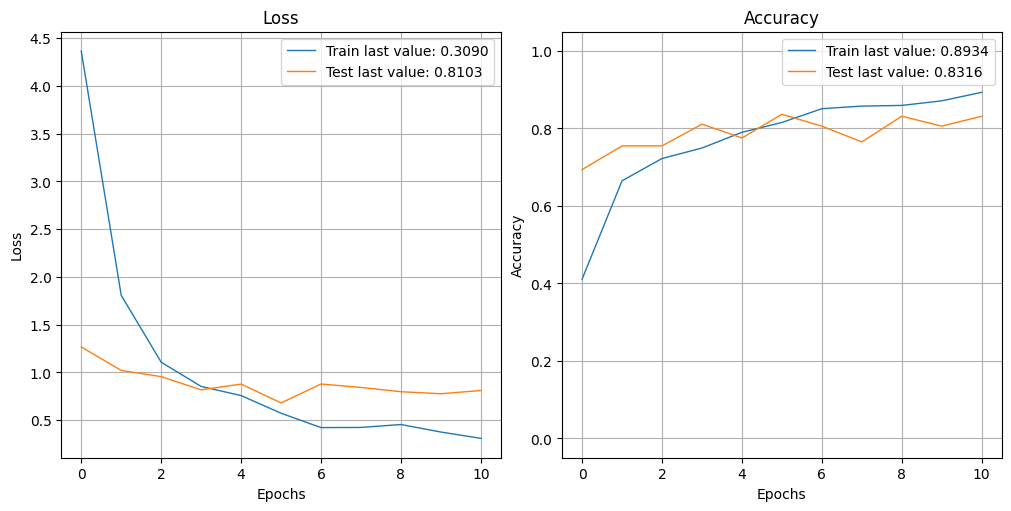

In [77]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()